## XgboostRegressor¶
#### Apply ML algorithms
* Linear Regression
* Lasso Regression
* Decision Tree Regressor
* KNN Regressor
* RandomForestRegressor
* Xgboost Regressor
* Huperparameter Tuning
* ANN- Artificial Neural Network

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Data/Real-Data/Real_Combine.csv')

In [3]:
df.head()

T    TM   Tm     SLP     H   VV    V    VM      PM 2.5
0   7.4   9.8  4.8  1017.6  93.0  0.5  4.3   9.4  219.720833
1   7.8  12.7  4.4  1018.5  87.0  0.6  4.4  11.1  182.187500
2   6.7  13.4  2.4  1019.4  82.0  0.6  4.8  11.1  154.037500
3   8.6  15.5  3.3  1018.7  72.0  0.8  8.1  20.6  223.208333
4  12.4  20.9  4.4  1017.3  61.0  1.3  8.7  22.2  200.645833

In [4]:
df.shape

(731, 9)

<AxesSubplot:>

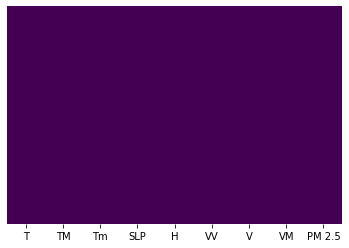

In [5]:
## check for null values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
df=df.dropna()

In [7]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [8]:
## check null values
X.isnull()

T     TM     Tm    SLP      H     VV      V     VM
0    False  False  False  False  False  False  False  False
1    False  False  False  False  False  False  False  False
2    False  False  False  False  False  False  False  False
3    False  False  False  False  False  False  False  False
4    False  False  False  False  False  False  False  False
..     ...    ...    ...    ...    ...    ...    ...    ...
726  False  False  False  False  False  False  False  False
727  False  False  False  False  False  False  False  False
728  False  False  False  False  False  False  False  False
729  False  False  False  False  False  False  False  False
730  False  False  False  False  False  False  False  False

[730 rows x 8 columns]

In [9]:
y.isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
726    False
727    False
728    False
729    False
730    False
Name: PM 2.5, Length: 730, dtype: bool

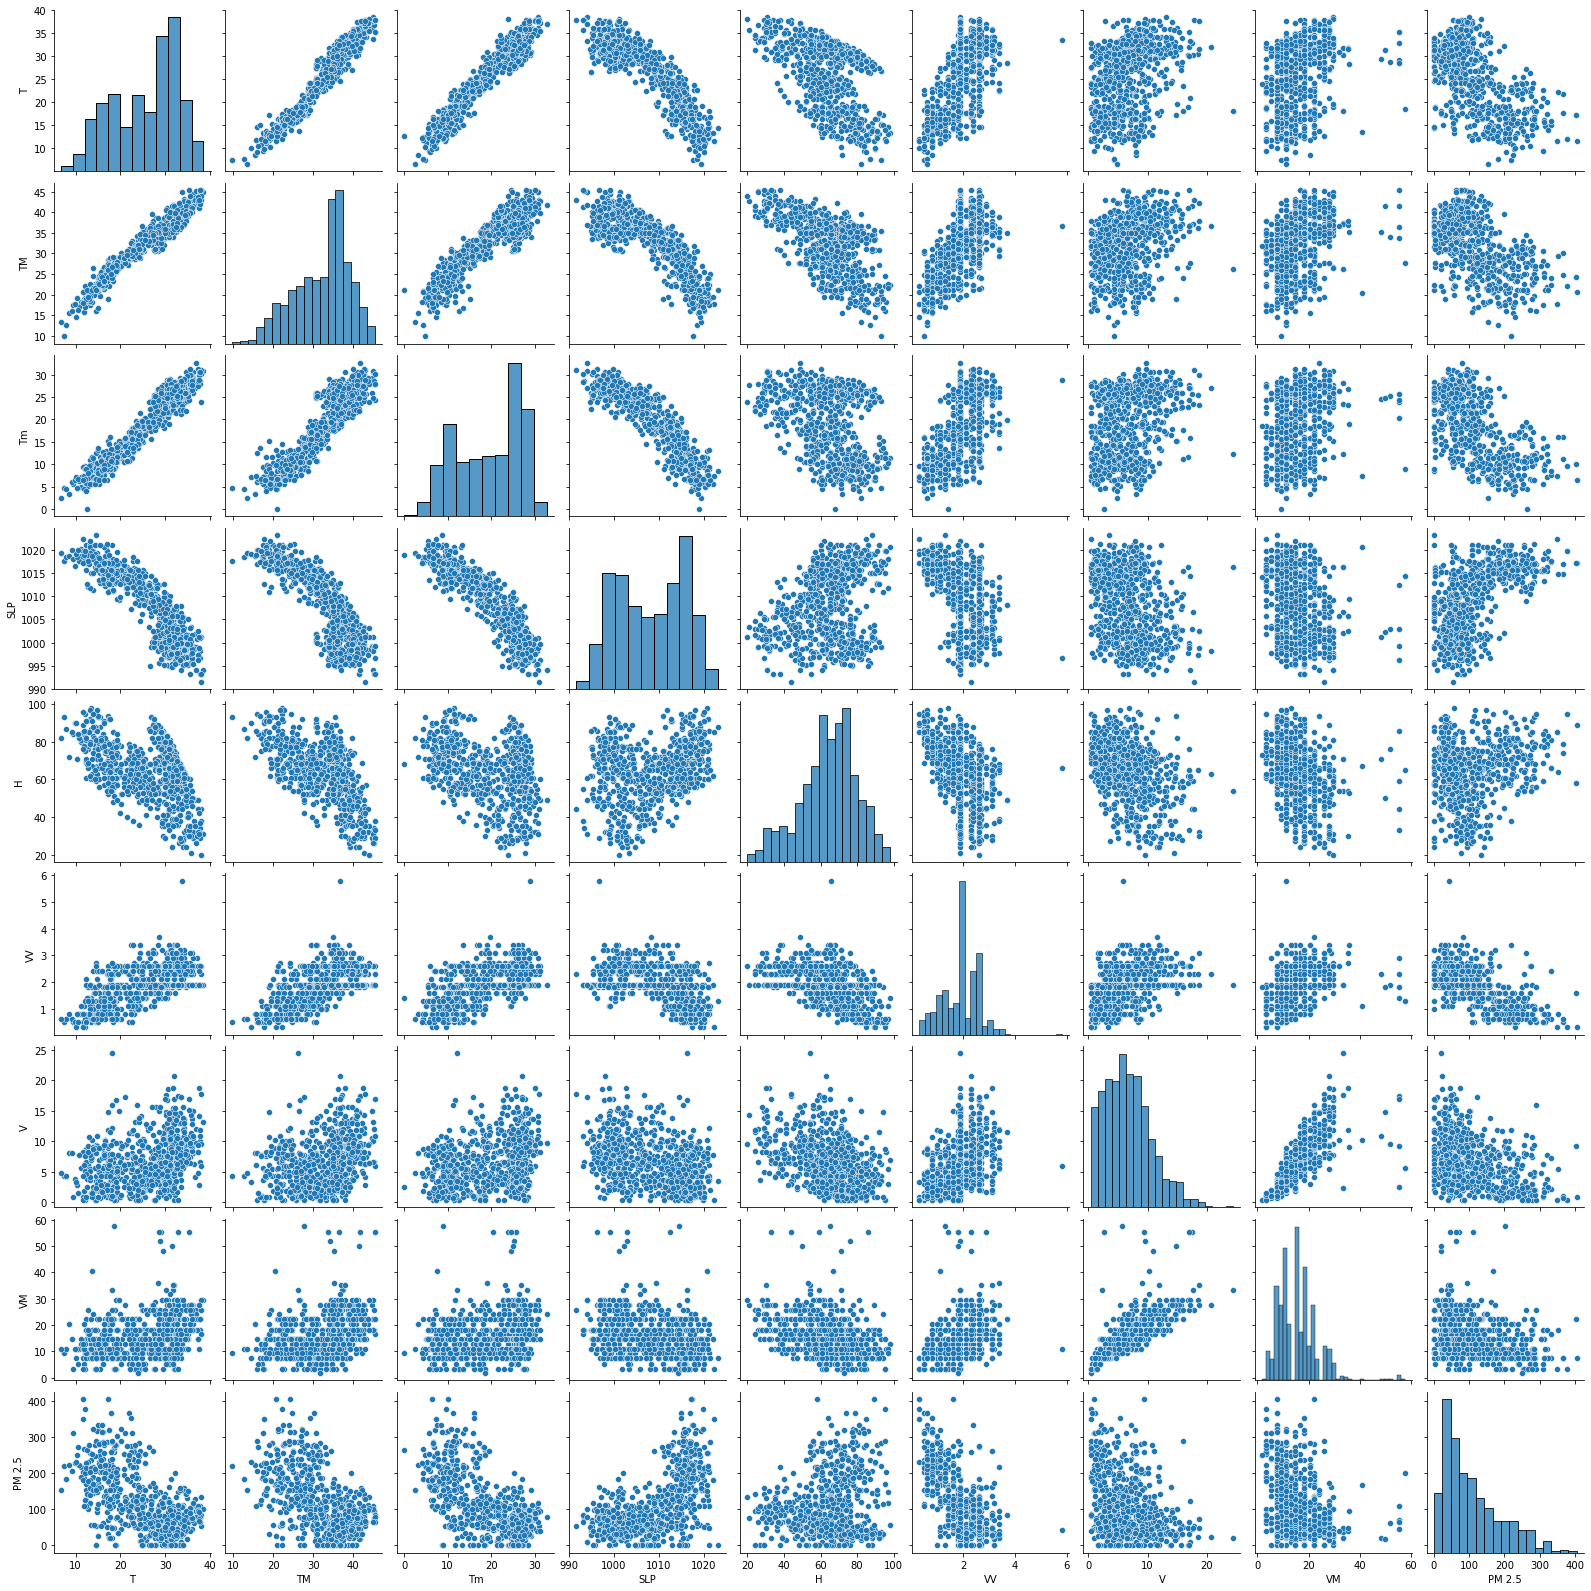

In [10]:
sns.pairplot(df)

In [11]:
df.corr()

T        TM        Tm       SLP         H        VV         V  \
T       1.000000  0.967276  0.958892 -0.884383 -0.518870  0.622637  0.326067   
TM      0.967276  1.000000  0.896699 -0.829254 -0.599629  0.598479  0.320116   
Tm      0.958892  0.896699  1.000000 -0.909514 -0.315305  0.560299  0.312904   
SLP    -0.884383 -0.829254 -0.909514  1.000000  0.274196 -0.491842 -0.346130   
H      -0.518870 -0.599629 -0.315305  0.274196  1.000000 -0.475279 -0.399079   
VV      0.622637  0.598479  0.560299 -0.491842 -0.475279  1.000000  0.402884   
V       0.326067  0.320116  0.312904 -0.346130 -0.399079  0.402884  1.000000   
VM      0.287138  0.299508  0.259431 -0.299830 -0.370981  0.347493  0.760777   
PM 2.5 -0.628336 -0.569381 -0.669059  0.615615  0.174658 -0.628621 -0.354799   

              VM    PM 2.5  
T       0.287138 -0.628336  
TM      0.299508 -0.569381  
Tm      0.259431 -0.669059  
SLP    -0.299830  0.615615  
H      -0.370981  0.174658  
VV      0.347493 -0.628621  
V       0.760777 -0.354799  
VM      1.000000 -0.283695  
PM 2.5 -0.283695  1.000000

## Correlation Matrix with Heatmap
Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

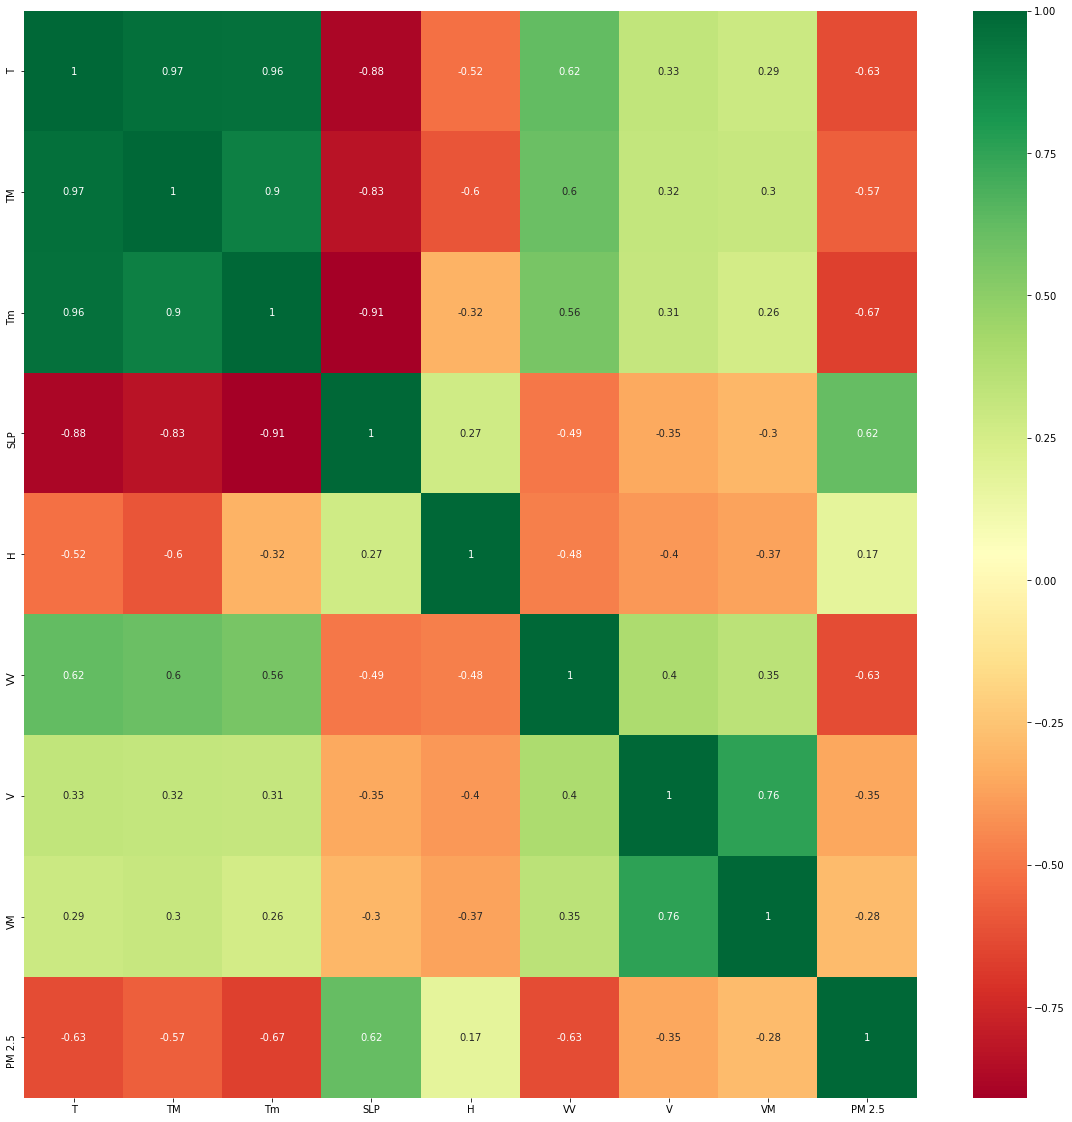

In [12]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [13]:
corrmat.index

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')

## Feature Importance
You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Regressor, we will be using Extra Tree Regressor for extracting the top 10 features for the dataset.

In [17]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [18]:
X.head()

T    TM   Tm     SLP     H   VV    V    VM
0   7.4   9.8  4.8  1017.6  93.0  0.5  4.3   9.4
1   7.8  12.7  4.4  1018.5  87.0  0.6  4.4  11.1
2   6.7  13.4  2.4  1019.4  82.0  0.6  4.8  11.1
3   8.6  15.5  3.3  1018.7  72.0  0.8  8.1  20.6
4  12.4  20.9  4.4  1017.3  61.0  1.3  8.7  22.2

In [19]:
print(model.feature_importances_)

[0.13650219 0.09158371 0.19556073 0.12686373 0.0833425  0.27311191
 0.05254873 0.04048651]


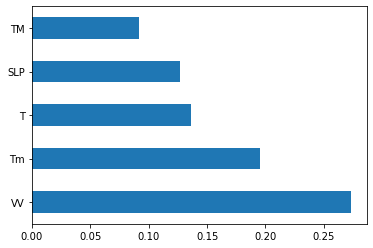

In [20]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

## Linear Regression

C:\Users\Ranjith\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

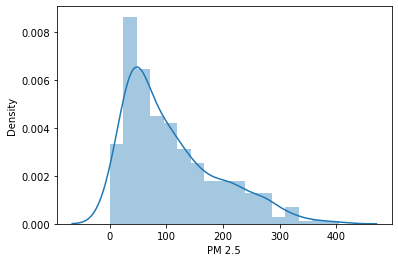

In [21]:
sns.distplot(y)

## Train Test Split

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [25]:
import xgboost as Xgb


In [27]:
regressor = Xgb.XGBRegressor()
regressor.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [28]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.9997842299242427


In [29]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.6104024046485017


In [30]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)

In [31]:
score.mean()

0.4545628713565547

###  Model Evaluation

In [32]:
prediction=regressor.predict(X_test)

C:\Users\Ranjith\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

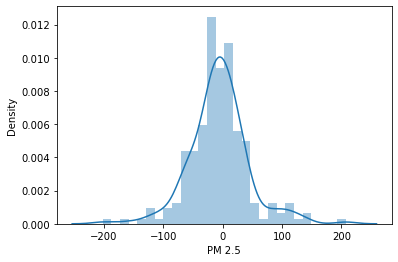

In [33]:
sns.distplot(y_test-prediction)

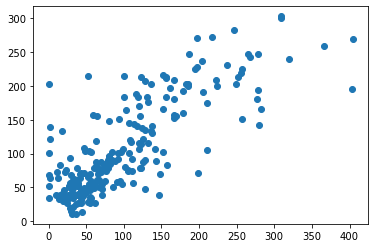

In [34]:
plt.scatter(y_test,prediction)

## Hyperparameter Tunning

In [35]:
xgb.XGBRegressor()

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)

In [36]:
from sklearn.model_selection import RandomizedSearchCV

In [37]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [38]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Various learning rate parameters
learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
#Subssample parameter values
subsample=[0.7,0.6,0.8]
# Minimum child weight parameters
min_child_weight=[3,4,5,6,7]

In [39]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': ['0.05', '0.1', '0.2', '0.3', '0.5', '0.6'], 'max_depth': [5, 10, 15, 20, 25, 30], 'subsample': [0.7, 0.6, 0.8], 'min_child_weight': [3, 4, 5, 6, 7]}


In [40]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
regressor=xgb.XGBRegressor()

In [41]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
xg_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [42]:
xg_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   0.8s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   0.9s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   0.7s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   0.7s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   0.7s
[CV] subsample=0.7, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.3, total=   0.8s
[CV] subsample=0.7, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.3 
[CV]  su

[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.3, total=   0.6s
[CV] subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.3, total=   0.6s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2 
[CV]  subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2, total=   0.7s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2 
[CV]  subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2, total=   0.7s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2 
[CV]  subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2, total=   0.7s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2 
[CV]  subsample

[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3, total=   0.6s
[CV] subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3, total=   0.6s
[CV] subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3, total=   0.7s
[CV] subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3, total=   0.8s
[CV] subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3, total=   0.7s
[CV] subsample=0.8, n_estimators=500, min_child_weight=3, max_depth=10, learning_rate=0.3 
[CV]  subsample

[CV]  subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=30, learning_rate=0.1, total=   0.6s
[CV] subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=30, learning_rate=0.1 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=30, learning_rate=0.1, total=   0.6s
[CV] subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=30, learning_rate=0.1 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=30, learning_rate=0.1, total=   0.6s
[CV] subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=20, learning_rate=0.3 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=20, learning_rate=0.3, total=   0.4s
[CV] subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=20, learning_rate=0.3 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=20, learning_rate=0.3, total=   0.4s
[CV] subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=20, learning_rate=0.3 
[CV]  subsample

[CV]  subsample=0.7, n_estimators=1200, min_child_weight=6, max_depth=5, learning_rate=0.1, total=   0.9s
[CV] subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05, total=   0.2s
[CV] subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05, total=   0.2s
[CV] subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05, total=   0.2s
[CV] subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05, total=   0.2s
[CV] subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05 
[CV]  

[CV]  subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05, total=   0.8s
[CV] subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05 
[CV]  subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05, total=   0.8s
[CV] subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05 
[CV]  subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05, total=   0.8s
[CV] subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05 
[CV]  subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05, total=   0.8s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=30, learning_rate=0.05 
[CV]  subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=30, learning_rate=0.05, total=   2.2s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=30, learning_rate=0.05 
[C

[CV]  subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   1.1s
[CV] subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.1 
[CV]  subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   1.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6, total=   0.2s
[CV] subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6, total=   0.2s
[CV] subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6, total=   0.2s
[CV] subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6 
[CV]  subsample

[CV]  subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3, total=   0.5s
[CV] subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3, total=   0.5s
[CV] subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3, total=   0.5s
[CV] subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3, total=   0.5s
[CV] subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3, total=   0.5s
[CV] subsample=0.6, n_estimators=600, min_child_weight=4, max_depth=25, learning_rate=0.2 
[CV]  subsample

[CV]  subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=5, learning_rate=0.3, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=5, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=5, learning_rate=0.3, total=   0.1s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5, total=   0.2s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5, total=   0.2s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5, total=   0.2s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5 
[CV]  subsample=0.7, n_es

[CV]  subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2, total=   0.6s
[CV] subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2 
[CV]  subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2, total=   0.6s
[CV] subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2 
[CV]  subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2, total=   0.6s
[CV] subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2 
[CV]  subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2, total=   0.6s
[CV] subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2 
[CV]  subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2, total=   0.6s
[CV] subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=30, learning_rate=0.6 
[CV]  subsample=0.7, n_e

[CV]  subsample=0.8, n_estimators=1100, min_child_weight=5, max_depth=25, learning_rate=0.6, total=   0.7s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=5, max_depth=25, learning_rate=0.6 
[CV]  subsample=0.8, n_estimators=1100, min_child_weight=5, max_depth=25, learning_rate=0.6, total=   0.6s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=5, max_depth=25, learning_rate=0.6 
[CV]  subsample=0.8, n_estimators=1100, min_child_weight=5, max_depth=25, learning_rate=0.6, total=   0.7s
[CV] subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=20, learning_rate=0.2 
[CV]  subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=20, learning_rate=0.2, total=   1.0s
[CV] subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=20, learning_rate=0.2 
[CV]  subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=20, learning_rate=0.2, total=   1.2s
[CV] subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=20, learning_rate=0.2 
[CV]  subs

[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.2, total=   0.5s
[CV] subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3, total=   0.8s
[CV] subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3, total=   0.8s
[CV] subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3, total=   0.7s
[CV] subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3, total=   0.7s
[CV] subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3 
[CV]  subsample

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  6.0min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=100, n_jobs=1,
                   par

In [44]:
xg_random.best_params_

{'subsample': 0.6,
 'n_estimators': 100,
 'min_child_weight': 4,
 'max_depth': 10,
 'learning_rate': '0.05'}

In [45]:
xg_random.best_score_

-2641.43566254388

In [46]:
rf_random.best_score_

NameError: name 'rf_random' is not defined

In [47]:
predictions=xg_random.predict(X_test)

C:\Users\Ranjith\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

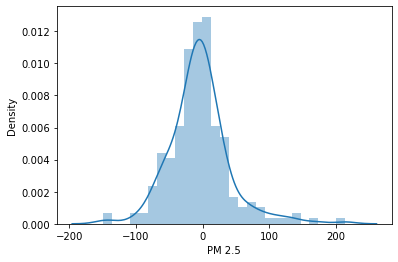

In [48]:
sns.distplot(y_test-predictions)

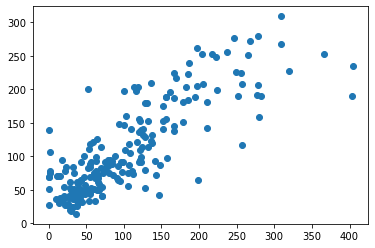

In [49]:
plt.scatter(y_test,predictions)

In [50]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 31.900516810482497
MSE: 2118.728943566487
RMSE: 46.029652872539536



### Regression Evaluation Metrics¶
Here are three common evaluation metrics for regression problems:

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
Mean Squared Error (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$
Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$
Comparing these metrics:

MAE is the easiest to understand, because it's the average error.
MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.
All of these are loss functions, because we want to minimize them.

In [52]:
from sklearn import metrics

In [53]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 35.6498071368608
MSE: 2543.353037655076
RMSE: 50.43166701245435


In [54]:
import pickle

In [55]:
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

NameError: name 'rf_random' is not defined